<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/p_Hacking_and_Multiple_Comparisons_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X
r_s = stats.spearmanr(Y, X)
print(f'Spearman Rank Coefficient: {r_s[0]}')
print(f'P-Value: {r_s[-1]}')

Spearman Rank Coefficient: 0.9999999999999999
P-Value: 0.0


In [3]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X + np.random.normal(0, 1, 100)
r_s = stats.spearmanr(Y, X)
print(f'Spearman Rank Coefficient: {r_s[0]}')
print(f'P-Value: {r_s[-1]}')

Spearman Rank Coefficient: 0.6526132613261325
P-Value: 1.884211003708645e-13


### Cutoff is Significance Level

In [5]:
cutoff = 0.05
X = pd.Series(np.random.normal(0, 1, 100))
Y = X
r_s = stats.spearmanr(Y, X)
pval = r_s[-1]

if pval < cutoff:
    print('There is significant evidence of a relationship')
else:
    print('There is not significant evidence of a relationship')

There is significant evidence of a relationship


### Experiment - Running Many Tests

In [6]:
df = pd.DataFrame()

N = 20
T = 100

for i in range(N):
    x = np.random.normal(0, 1, T)
    X = pd.Series(X)
    name = f'X{i}'
    df[name] = X

df.head(10)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470,0.986470
1,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542,2.385542
2,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383,0.544383
3,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319,0.653319
4,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040,-1.211040
5,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140,-0.627140
6,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810,-0.290810
7,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860,-1.090860
8,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347,-0.987347
9,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142,0.544142


In [17]:
cutoff = 0.05
significant_pairs = []

for i in range(20):
    for j in range(i+1, 20):
        Xi = df.iloc[:, i]
        Xj = df.iloc[:, j]

        results = stats.spearmanr(Xi, Xj)

        pvalue = results[1]

        if pvalue < cutoff:
            significant_pairs.append((i, j))

In [18]:
N * (N - 1) / 2 * cutoff

9.5

In [19]:
len(significant_pairs)

190

In [21]:
def do_experiment(N, T, cutoff=0.05):
    df = pd.DataFrame()

    for i in range(N):
        X = pd.Series(np.random.normal(0, 1, T))
        name = f'X{i}'
        df[name] = X

    significant_pairs = []

    for i in range(N):
        for j in range(i + 1, N):
            xi = df.iloc[:, i]
            xj = df.iloc[:, j]
            results = stats.spearmanr(xi, xj)

            pvalue = results[1]
            if pvalue < cutoff:
                significant_pairs.append((i, j))
    return significant_pairs

In [22]:
n_experiments = 100
results = np.zeros((n_experiments, ))

for i in range(n_experiments):
    result = do_experiment(20, 100)
    n = len(result)
    results[i] = n

print(f'Mean of results: {np.mean(results)}')

Mean of results: 9.66


### Visualizing what is going on

In [24]:
def get_pvalues_from_experiment(N, T):
    df = pd.DataFrame()

    for i in range(N):
        X = pd.Series(np.random.normal(0, 1, T))
        name = f'X{i}'
        df[name] = X

    pvalues = []
    for i in range(N):
        for j in range(i + 1, N):
            xi = df.iloc[:, i]
            xj = df.iloc[:, j]
            results = stats.spearmanr(xi, xj)
            pvalues.append(results[1])

    return pvalues

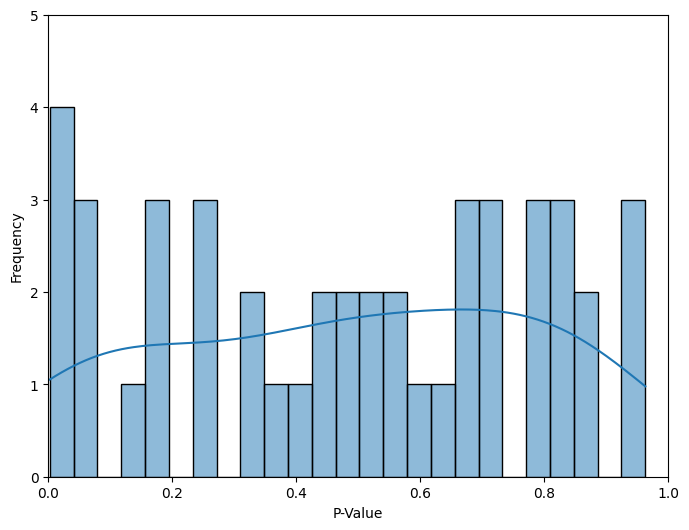

In [27]:
pvalues = get_pvalues_from_experiment(10, 100)
fig, ax = plt.subplots(figsize=(8, 6))
hplot = sns.histplot(pvalues, bins=25, kde=True, ax=ax)
ax.set_xlabel('P-Value')
ax.set_ylabel('Frequency')
ax.set_xlim([0, 1])
ax.set_ylim([0, 5])
plt.show()

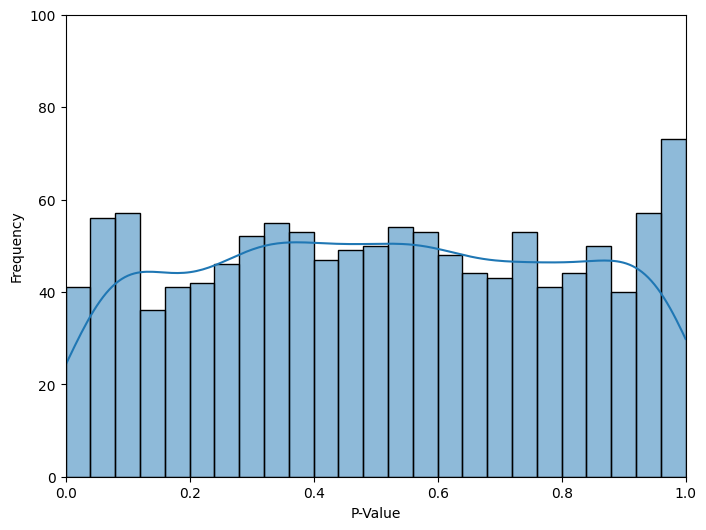

In [31]:
pvalues = get_pvalues_from_experiment(50, 100)
fig, ax = plt.subplots(figsize=(8, 6))
hplot = sns.histplot(pvalues, bins=25, kde=True, ax=ax)
ax.set_xlabel('P-Value')
ax.set_ylabel('Frequency')
ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
plt.show()

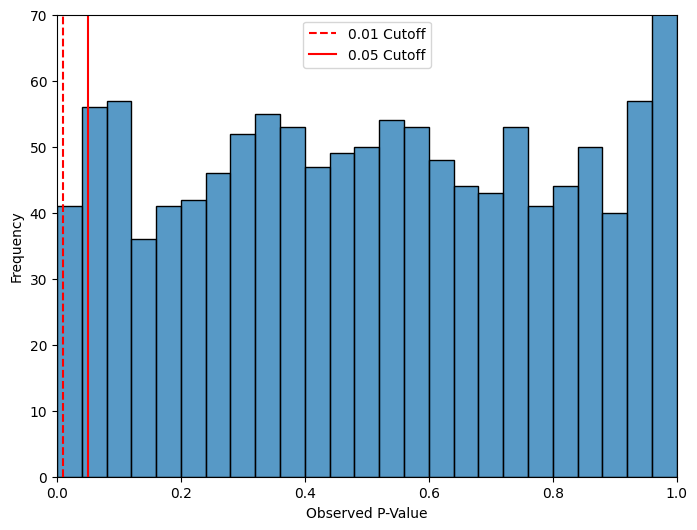

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
hplot = sns.histplot(pvalues, bins=25, ax=ax)
ax.axvline(x=0.01, ymax=100, color='r', linestyle='--', label='0.01 Cutoff')
ax.axvline(x=0.05, ymax=100, color='r', linestyle='-', label='0.05 Cutoff')
ax.set_xlabel('Observed P-Value')
ax.set_ylabel('Frequency')
ax.set_xlim([0, 1])
ax.set_ylim([0, 70])
ax.legend()
plt.show()

In [44]:
n_experiments = 100
results = np.zeros((n_experiments))

for i in range(n_experiments):
    result = do_experiment(20, 100, cutoff=0.01)
    n = len(result)
    results[i] = n

np.mean(results)

2.05

In [45]:
(N * (N - 1) / 2) * 0.01

1.9000000000000001

### Example: Bon Ferroni Correction

In [46]:
n_experiments = 100
results = np.zeros((n_experiments))
N = 20
T = n_experiments
desired_level = 0.05
num_tests = N * (N - 1) / 2
new_cutoff = desired_level / num_tests

for i in range(n_experiments):
    result = do_experiment(20, 100, cutoff=new_cutoff)
    n = len(result)
    results[i] = n

np.mean(results)

0.03